In [52]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i,interval = "1d", start=datetime(2020, 12, 27), end=datetime(2024, 1, 11)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

# ticks = ["BTC-USD",'ETH-USD','BNB-USD']#,'SOL-USD','XRP-USD','ADA-USD','AVAX-USD','TRX-USD','DOT-USD','MATIC-USD','LINK-USD','ICP-USD','SHIB-USD','DOGE-USD','LTC-USD','STETH-USD','BCH-USD','ETC-USD','UNI7083-USD','OP-USD','ATOM-USD','LEO-USD','WEOS-USD','NEAR-USD','XLM-USD','LDO-USD','OKB-USD','INJ-USD','IMX10603-USD','FIL-USD','APT21794-USD','XMR-USD','HBAR-USD','BXC5168-USD','KAS-USD','MNT27075-USD','TIA22861-USD','STX4847-USD','VET-USD','CRO-USD','MKR-USD','BSV-USD','GRT6719-USD','RETH-USD','AAVE-USD','SEI-USD','RUNE-USD','HEX-USD','ALGO-USD','ORDI-USD','EGLD-USD','QNT-USD','RNDR-USD','TAO22974-USD','FLOW-USD','SUI20947-USD','MINA-USD','1000SATS-USD','HNT-USD','SNX-USD','FTM-USD'] #Name of company (Dominos pizza)
ticks = ['EURUSD=X', 'JPY=X', 'GBPUSD=X','AUDUSD=X','NZDUSD=X','EURJPY=X','GBPJPY=X','EURGBP=X','EURCAD=X']
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
(793, 9)


,EURUSD=X,JPY=X,GBPUSD=X,AUDUSD=X,NZDUSD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURCAD=X
Date,,,,,,,,,
2024-01-04,1.092777,142.998993,1.267427,0.673600,0.625129,156.227997,181.203003,0.86201,1.45824
2024-01-05,1.094739,144.764999,1.268408,0.670659,0.623130,158.468002,183.604996,0.86303,1.46184
2024-01-08,1.094224,144.716003,1.271779,0.671641,0.624879,158.339996,184.037994,0.86032,1.46172
2024-01-09,1.095170,144.229996,1.274519,0.672000,0.625180,157.934006,183.789993,0.85921,1.46185
2024-01-10,1.093243,144.427994,1.271294,0.668470,0.623830,157.886002,183.576996,0.85996,1.46365


In [53]:
corr_matrix = d.pct_change().corr()
corr_matrix

,EURUSD=X,JPY=X,GBPUSD=X,AUDUSD=X,NZDUSD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURCAD=X
EURUSD=X,1.000000,-0.430396,0.755043,0.660610,0.654392,0.404557,0.300880,0.063450,0.565193
JPY=X,-0.430396,1.000000,-0.435705,-0.432023,-0.451333,0.647005,0.535106,0.065204,-0.220680
GBPUSD=X,0.755043,-0.435705,1.000000,0.714916,0.711135,0.201402,0.523971,-0.339964,0.238596
AUDUSD=X,0.660610,-0.432023,0.714916,1.000000,0.899760,0.121497,0.260525,-0.124284,-0.010430
NZDUSD=X,0.654392,-0.451333,0.711135,0.899760,1.000000,0.095145,0.238336,-0.148901,0.050697
EURJPY=X,0.404557,0.647005,0.201402,0.121497,0.095145,1.000000,0.798711,0.112455,0.244223
GBPJPY=X,0.300880,0.535106,0.523971,0.260525,0.238336,0.798711,1.000000,-0.258228,0.013651
EURGBP=X,0.063450,0.065204,-0.339964,-0.124284,-0.148901,0.112455,-0.258228,1.000000,0.188760
EURCAD=X,0.565193,-0.220680,0.238596,-0.010430,0.050697,0.244223,0.013651,0.188760,1.000000


<AxesSubplot: >

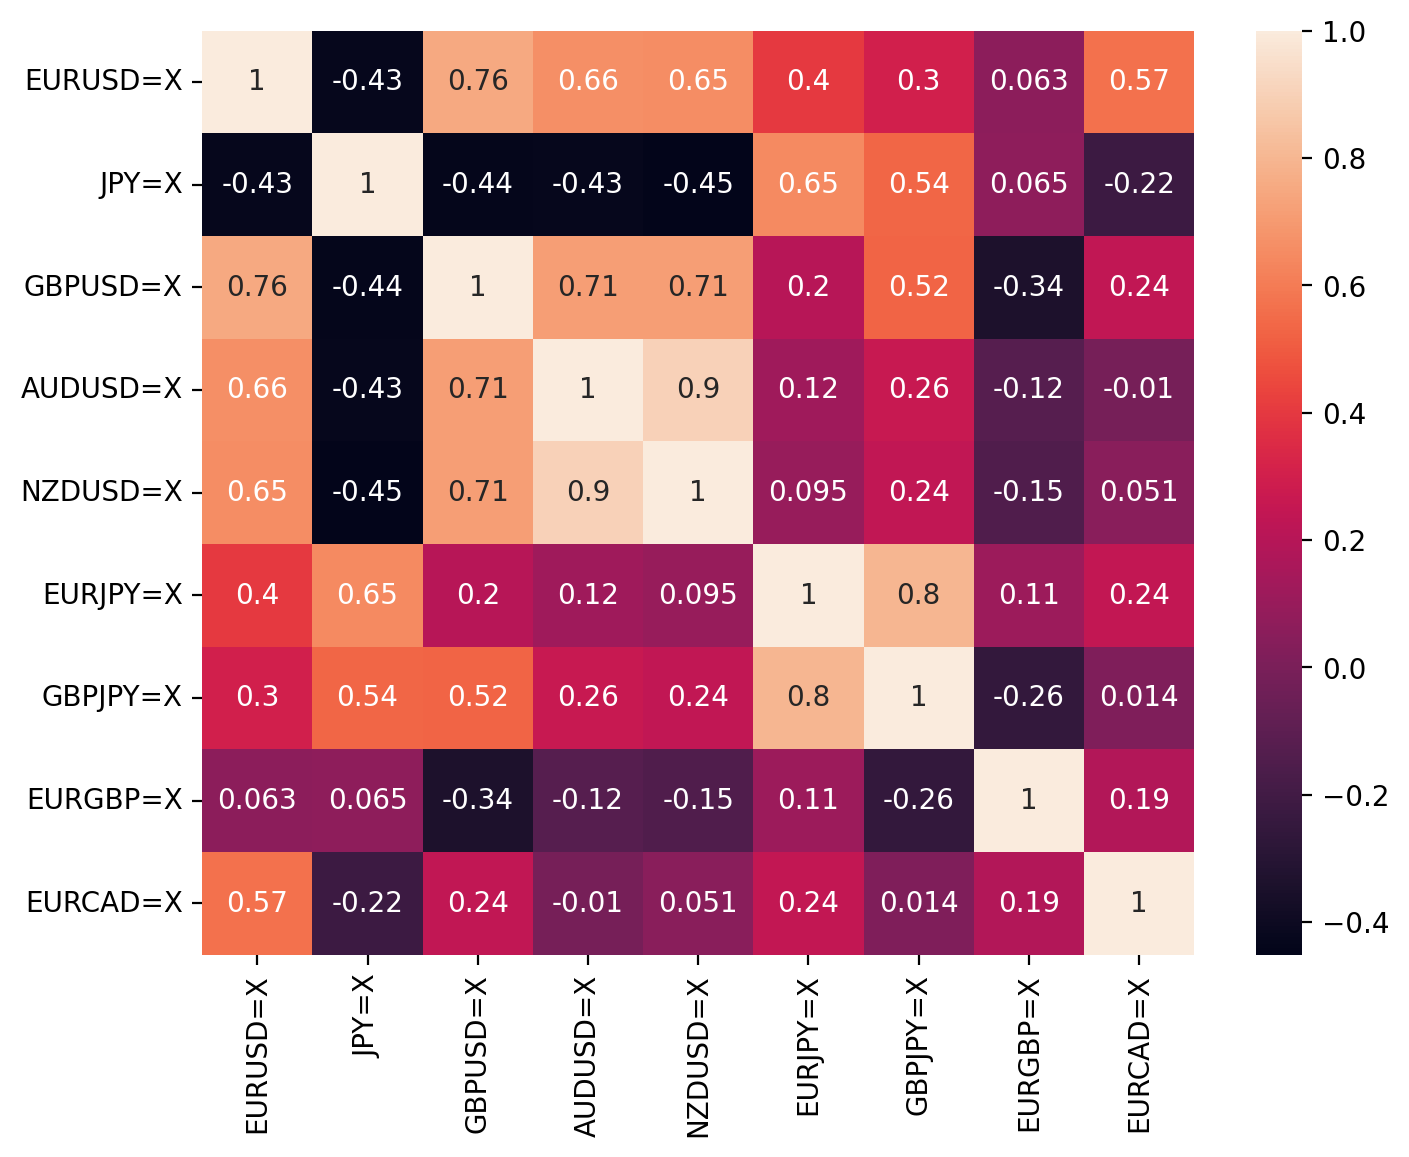

In [54]:
# Let's heatmap this matrix so that we can have a better sense of what is going on
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

In [138]:
#Top cointegrated points pairs
#NEDL excel
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,coint
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import random
n = 8 #check pairs
pairs = corr_matrix.unstack().sort_values(ascending=False)[len(ticks):len(ticks)+n].keys()
onep = {}
fivep = {}

ind = 0
for p in set(pairs):
    X,Y = p[0],p[1]
    print(X,Y)
    df = pd.DataFrame(d[X])
    df[Y] = d[Y]
    df.dropna(subset=[X, Y], inplace=True)
    slope, intercept = np.polyfit(df[X],df[Y], 1)#polyfit(X,Y,1)
    # print('slope:',slope,'intercept:',intercept)
    coint = slope*df[X] + intercept
    coint_diff = df[Y] - coint
    result = adfuller(coint_diff)
    if result[0] <= -3.43:
        onep[random.random()] = X,Y , slope,intercept
    if result[0] >= -3.43 and result[0]<=-2.865:
        fivep[random.random()] = X,Y, slope,intercept


AUDUSD=X GBPUSD=X
EURJPY=X GBPJPY=X
GBPJPY=X EURJPY=X
EURUSD=X GBPUSD=X
GBPUSD=X AUDUSD=X
NZDUSD=X AUDUSD=X
GBPUSD=X EURUSD=X
AUDUSD=X NZDUSD=X


In [152]:
#NEDL excel
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,coint
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

X = 'NZDUSD=X'
Y = 'AUDUSD=X'

df = pd.DataFrame(d[X])
df[Y] = d[Y]
df.dropna(subset=[X, Y], inplace=True)
slope, intercept = np.polyfit(df[X],df[Y], 1)#polyfit(X,Y,1)
print('slope:',slope,'intercept:',intercept)
coint = slope*df[X] + intercept
coint_diff = df[Y] - coint
result = adfuller(coint_diff)
print("Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
print('If Test Statistic less than critical values series is stationary')
vol = coint_diff.std()
print('volatility:',vol)
fig, ax = plt.subplots()

coint_diff.plot(ax=ax,label = 'difference  ')
ax.axhline(1*vol,color = 'r', linestyle='--', label='Upper Bound (1 sigma)')
ax.axhline(-1*vol,color = 'r', linestyle='--', label='Lower Bound (1 sigma)')
ax.axhline(coint_diff.mean(), linestyle='--', label='mean')
plt.legend()
plt.show()

ValueError: too many values to unpack (expected 2)

In [122]:
from scipy.optimize import minimize

def objective(x):
    x1 = x[0]
    x2 = x[1]
    return adfuller((df[Y] - (x1*df[X] + x2))**2)[0]
x = [0,0]
res = minimize(objective, x, method='Nelder-Mead', bounds=[(-1000, 1000),(-100000,100000)])
res

 final_simplex: (array([[ 0.08402442, -4.56170216],
       [ 0.08402414, -4.56161367],
       [ 0.08402402, -4.56168621]]), array([-6.04389733, -6.04389733, -6.04389733]))
           fun: -6.043897334650943
       message: 'Optimization terminated successfully.'
          nfev: 145
           nit: 76
        status: 0
       success: True
             x: array([ 0.08402442, -4.56170216])

Test Statistic: -4.180074340036667
p-value: 0.0007119843175238586
Critical Values: {'1%': -3.436039176245612, '5%': -2.8640521575678655, '10%': -2.5681075333056036}
If Test Statistic less than critical values series is stationary
volatility: 3.1329888391992684


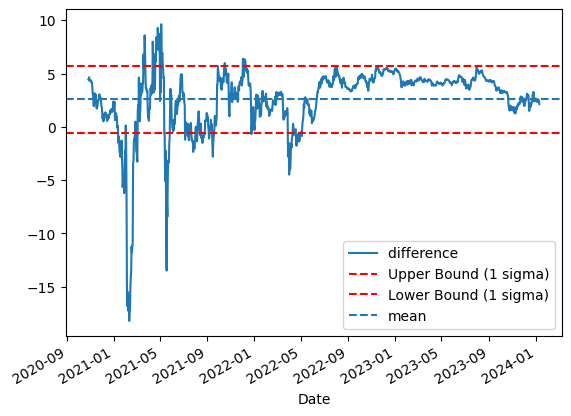

In [126]:
#plotting best
coint = res.x[0]*df[X] + res.x[1]
coint_diff = df[Y] - coint
result = adfuller(coint_diff)
print("Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
print('If Test Statistic less than critical values series is stationary')
vol = coint_diff.std()
mean = coint_diff.mean()
print('volatility:',vol)
fig, ax = plt.subplots()

coint_diff.plot(ax=ax,label = 'difference  ')
ax.axhline(mean +1*vol,color = 'r', linestyle='--', label='Upper Bound (1 sigma)')
ax.axhline(mean -1*vol,color = 'r', linestyle='--', label='Lower Bound (1 sigma)')
ax.axhline(mean, linestyle='--', label='mean')
plt.legend()
plt.show()

In [65]:
#NEDL python
import scipy.optimize as spop
import statsmodels.api as sm
#two = a + b*one
def unit_root(b):
    one = LINK = d['LINK-USD'] # S&P 500
    two = d['SOL-USD'] # Berkshire Class A share
    a = np.average(two - b*one)
    fair_value = a + b*one
    diff = np.array(fair_value - two)
    diff_diff = diff[1:] - diff[:-1]
    reg = sm.OLS(diff_diff,diff[:-1])
    res = reg.fit()
    return res.params[0]/res.bse[0]
res1 = spop.minimize(unit_root, 0,method = 'Nelder-Mead')
t_opt = res1.fun
b_opt = float(res1.x)
a_opt = np.average(two - b_opt*one)
fair_value = a_opt + b_opt*one
b_opt

-1172061803023172.0